In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# **Aquire data**

In [0]:
## Import data
train_df = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1547163969&Signature=earkqb%2F8fRhuKmFksNZoqqs21xEjqvEAQrym5QKv1Upi2%2BBWGQrXgBCSKUiK%2BA0gDXlutLv6WSp3JRwlkRHsnpYNNR0xET88AuNXQJiHab7zu8Wd39c%2ByWC0O0gM4I2yC0wFP%2BSOQIgPal1HNRXiR6gkAF83Phat%2BJrPfUTdoWDwELgl5Y03ezjdS3RlWXn%2BfkimkdY%2BrfDW0d4THxcOo1xkpjyqAGPsuXBLJvJhKgoO76NPuZFJ0m7os41skNobfPnhQvmg%2FPIIMy%2FkrV9cgXPOd1wY16L99OaXgxZBZR9zyDols5taJVKTJgRkgzwYAXUIZ1f5M7fcwv3QC7QX8g%3D%3D')
test_df = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1547163934&Signature=XEq5fOpjrWVrqkZM2wA%2BL7wdXTA%2FLFG0O31U3gL%2Bx1LSQUmxVy4kt9c9GFKH8%2FI5qkqwlwFW4%2BGiIzONiVsGFUOsJQC4kHnIA6DqdoxvNQLJ4bgscm1i3aTiDCIbciRl0qTROQPx9XBI6YOXmTKDzwJUPQvUg5aE2NcTa5RdGUPKoSt4iylDkxgEnrf%2FZrPF6%2FeZQ%2BAIh%2FJ%2B6w3rbz%2BsD6EOqxlm6QSuxW%2FNr0fweLIljxA3%2F9hvrhG9Bj62Hhw9pMxWnanfBSpE7BWwqvwYqKXgnlDmQJF9t7B0mmzufzJEqz%2BITA4%2B0laqyrXxPWUSbPNjF3J2lm%2BFv7bEofxQ7Q%3D%3D')

# **Explore data analysis**

In [0]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

*   Categorical feature: Survived, Sex, and Embarked. Ordinal: Pclass.
*   Continous feature: Age, Fare. Discrete: SibSp, Parch.
*   Notice that there is a lot of null value in Cabin(77% missing in trainig dataset, 78% missing in test dataset).
*   Age and Embarked columns are incomplete in training dataset. Age feature is incomplete in test dataset.
*   We decide to drop unnecessary columns(PassengerId, Name, Ticket) and Cabin columns for future analysis and prediction.








In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nicholson, Mr. Arthur Ernest",male,347082,G6,S
freq,1,577,7,4,644


*   Total samples are 891, which is 40% of the actual number of passengers on board(2,224).
*   38.3% sample survival rate while the actual survival rate was 32.5%(722 out of 2224).



## Pclass


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


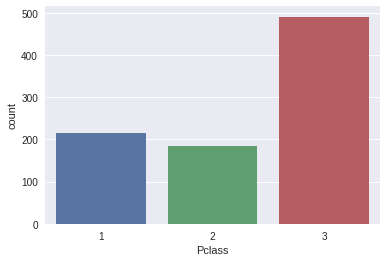

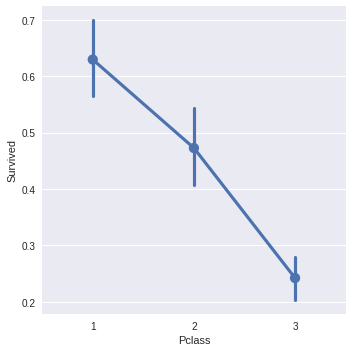

In [0]:
sns.countplot(x='Pclass', data=train_df)
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df, size=5)

In [0]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


*   Over half of the passengers were in Class 3(55.1%).
*   Upper-class(Pclass = 1) passengers were more likely to survive with  62.9% survival rate.
*   Class 3 passengers only had 24.2% survival rate.




## Sex

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


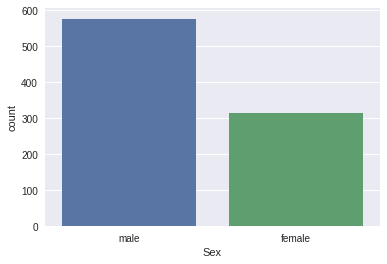

In [0]:
sns.countplot(x='Sex', data=train_df)

In [0]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


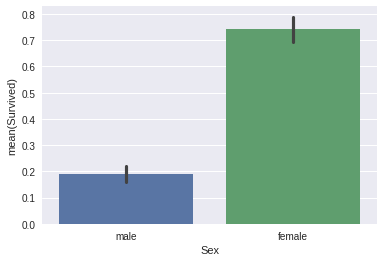

In [0]:
sns.barplot(x='Sex', y='Survived', data=train_df)

In [0]:
print (train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


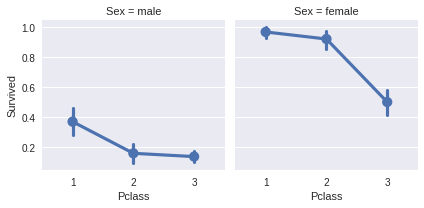

In [0]:
## combine influence of sex and pclass
g = sns.FacetGrid(train_df, col="Sex")
g = g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

* 64.8% of the passengers are male.
* Female passengers have a high survival rate(74.2%) while only 18.8% male passengers survived. 

## Age

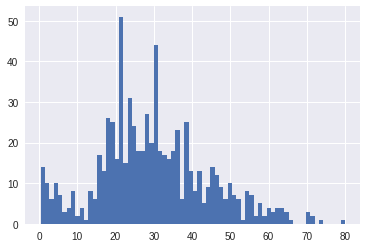

In [0]:
## Understand the age distribution of passengers.
train_df['Age'].hist(bins=70)

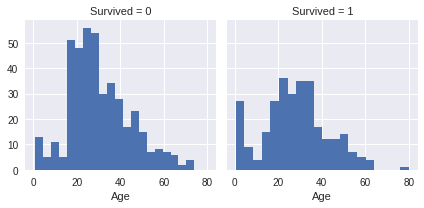

In [0]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


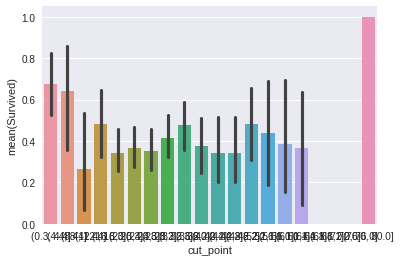

In [0]:
train_df['bins']=pd.cut(train_df['Age'], bins=20,precision=1)
train_df['cut_point']=train_df['bins']
sns.barplot(x='cut_point', y='Survived', data=train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


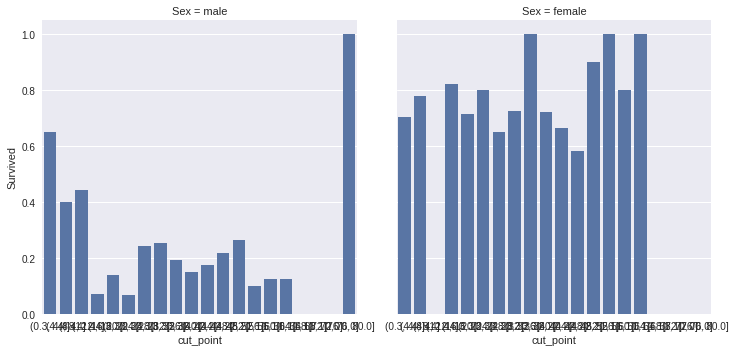

In [0]:
## combine influence of sex and age
train_df['bins']=pd.cut(train_df['Age'], bins=20,precision=1)
train_df['cut_point']=train_df['bins']
g=sns.FacetGrid(train_df,col='Sex',col_wrap=3,size=5)
g=g=g.map(sns.barplot,'cut_point','Survived',ci=0, estimator=np.mean)


*  Most passengers are in 15-40 age range.
*  Few elderly passengers (<1%) within age range 65-80. The oldest passengers (Age = 80) survived.
*  Children (Age <= 8) were more likely to have survived(Over 60% survival rate).
* Age group 8-12 have the lowest survival rate(Under 30%).
*  For female, they have a high survival rate regardless of age while male passengers have a pretty low survival rate expect for children.





## Family 

In [0]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [0]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [0]:
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [0]:
print (train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean())

   Family  Survived
0       0  0.303538
1       1  0.552795
2       2  0.578431
3       3  0.724138
4       4  0.200000
5       5  0.136364
6       6  0.333333
7       7  0.000000
8      10  0.000000


* Most passengers did not travel with family members. Less than 25% of the passengers traveled with parents or children. Only 31.7% of the passengers had siblings and/or spouse aboard.
* Passengers who travel with family member were more likely to survive.

## Fare

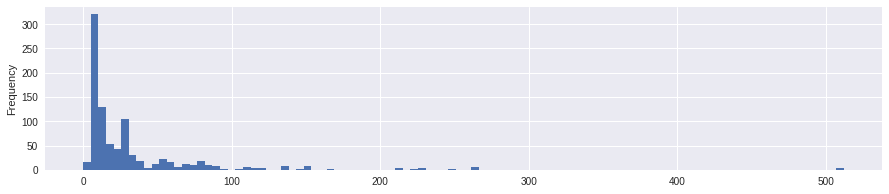

In [0]:
train_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100)

In [0]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Higher fare paying passengers had better survival. This feature is similar to Pclass.


## Embarked


In [0]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


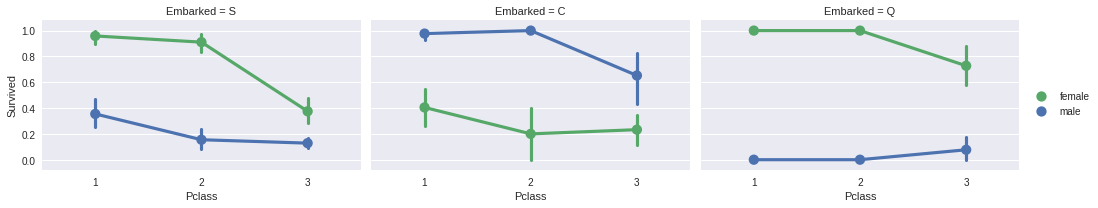

In [0]:
grid = sns.FacetGrid(train_df, col='Embarked', size=3, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

* Most passengers embarked at S(72.4%).
* Male passengers who embarked at C had higher survival rate than female 
* Ports of embarkation have varying survival rates for Pclass=3 among male passengers. 

# Data Cleaning

In [0]:
## Drop unnecessary columns

train_df = train_df.drop(['PassengerId','Name','Ticket','Cabin','FareBand'], axis=1)
test_df    = test_df.drop(['Name','Ticket','Cabin'], axis=1)

In [0]:
## Sex

## Converting categorical feature Sex into numerical values where female = 1 and male = 0.
train_df.loc[train_df['Sex']=='male','Sex'] = 0
train_df.loc[train_df['Sex']=='female','Sex'] = 1
test_df.loc[test_df['Sex']=='male','Sex'] = 0
test_df.loc[test_df['Sex']=='female','Sex'] = 1

In [0]:
## Age

## generate random numbers between (mean - std) and (mean + std) to replace missing value.

average_age_train   = train_df["Age"].mean()
std_age_train      = train_df["Age"].std()
count_nan_age_train = train_df["Age"].isnull().sum()

average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

train_df["Age"][np.isnan(train_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

train_df['Age'] = train_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
## Family

## Use family feature to replace Parch and SibSp.

train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
## Embarked

## Fill the missing values with the most common occurrence(S).

train_df['Embarked'] = train_df['Embarked'].fillna('S')

## Convert the Embarked feature by creating a new numeric feature.

train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)



In [0]:
## Fare 

## There is a missing value in test dataset. We use median to replace it.

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


In [0]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22,7.2500,0,1
1,1,1,1,38,71.2833,1,1
2,1,3,1,26,7.9250,0,0
3,1,1,1,35,53.1000,0,1
4,0,3,0,35,8.0500,0,0


In [0]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,0,34,7.8292,2,0
1,893,3,1,47,7.0000,0,1
2,894,2,0,62,9.6875,2,0
3,895,3,0,27,8.6625,0,0
4,896,3,1,22,12.2875,0,1


# Modeling and prediction

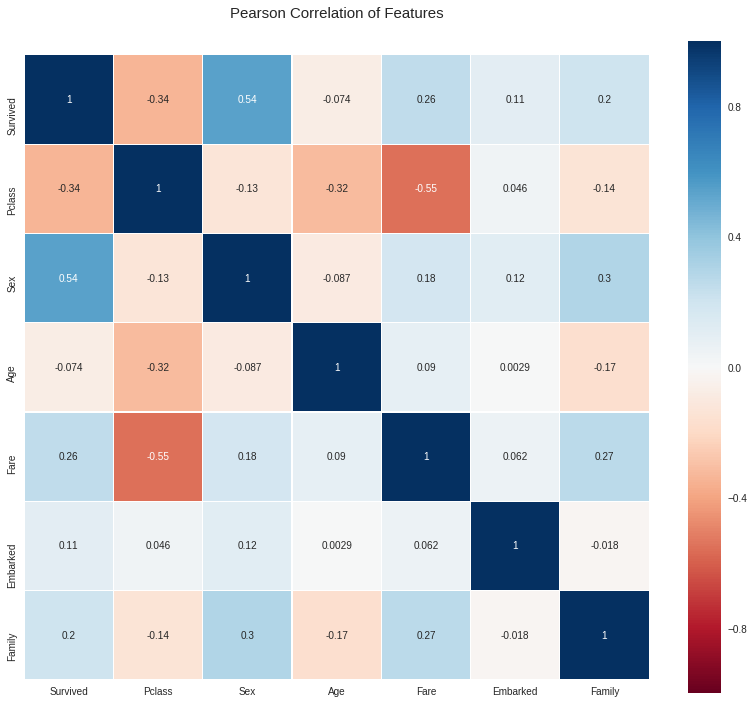

In [0]:
# Pearson Correlation of Features

# The plot indicts that there are not too many features strongly correlated with one another. 

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
# define training and testing sets

X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [0]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7934904601571269

In [0]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.474100
4,Embarked,0.315332
5,Family,0.007062
3,Fare,0.001077
2,Age,-0.027713
0,Pclass,-1.058226


In [0]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9012345679012346

In [0]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9842873176206509

In [0]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, Y_train)

0.8294051627384961

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.7800224466891134

In [0]:
# Model evaluation
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Random Forest','KNN', 'Naive Bayes'],
    'Score': [ logreg.score(X_train, Y_train),svc.score(X_train, Y_train), random_forest.score(X_train, Y_train), knn.score(X_train, Y_train), gaussian.score(X_train, Y_train)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.984287
1,Support Vector Machines,0.901235
3,KNN,0.829405
0,Logistic Regression,0.793490
4,Naive Bayes,0.780022


Text(0.5,0,'Relative Importance')

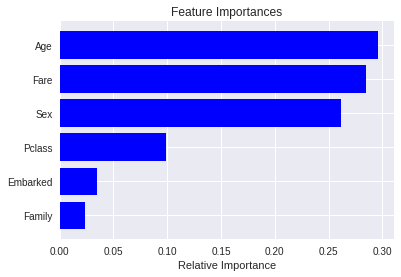

In [0]:
# Random Forest model feature importance 

importances = random_forest.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_prediction.csv', index=False)